In [1]:
pip install docplex

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importanto Cplex. 
from docplex.mp.model import Model

In [2]:
# Inicializando el modelo
mdl = Model('modelo')

In [3]:
# Creando las variables de decisión - continuas

x1 = mdl.continuous_var(name='x1')
x2 = mdl.continuous_var(name='x2')

$$ x_1 + x_2 <= 80 $$


$$2x_1 + x_2 <= 100$$


$$x_1 <= 40$$ 


$$x_1,x_2 >= 0$$ 




In [4]:
# Escribiendo las restricciones

mdl.add_constraint(x1+x2 <= 80)
mdl.add_constraint(2*x1+x2 <= 100)
mdl.add_constraint(x1 <= 40)

docplex.mp.LinearConstraint[](x1,LE,40)

$$MaxZ = 27x_1 + 21x_2 - (10x_1 + 9x_2) - (14x_1+10x_2) $$

In [5]:
# Creando la función objetivo
mdl.maximize(27*x1+21*x2-10*x1-9*x2-14*x1-10*x2)

In [6]:
print(mdl.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: modelo

Maximize
 obj: 3 x1 + 2 x2
Subject To
 c1: x1 + x2 <= 80
 c2: 2 x1 + x2 <= 100
 c3: x1 <= 40

Bounds
End



In [7]:
solucion = mdl.solve(log_output=True)

Version identifier: 12.10.0.0 | 2019-11-27 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
Tried aggregator 1 time.
LP Presolve eliminated 1 rows and 0 columns.
Reduced LP has 2 rows, 2 columns, and 4 nonzeros.
Presolve time = 0.00 sec. (0.00 ticks)

Iteration log . . .
Iteration:     1   Dual infeasibility =             0.000000
Iteration:     2   Dual objective     =           180.000000


In [8]:
solucion.display()

solution for: modelo
objective: 180.000
x1 = 20.000
x2 = 60.000


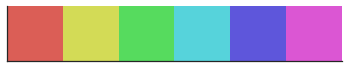

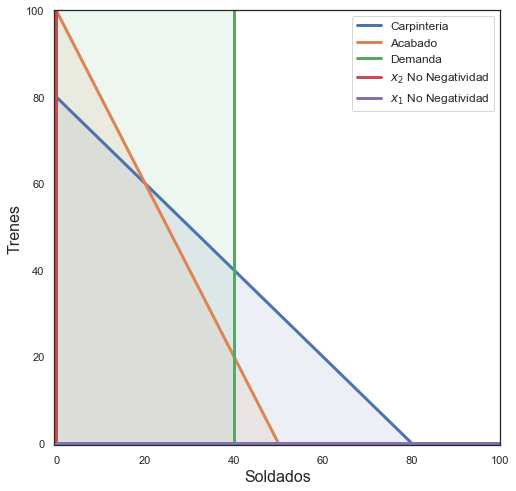

In [11]:
# Graficando 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import seaborn as sns

colores=sns.palplot(sns.color_palette("hls", ))
sns.set()
sns.set(style='white')
sns.despine()
sns.set_context('notebook')

# Crear un objeto gráfico.
fig, ax = plt.subplots(figsize=(8, 8))
x1 = np.linspace(0, 100)

# agregando la restricción de horas de capintería
plt.plot(x1, 80 - x1, lw=3, label='Carpinteria')
plt.fill_between(x1, 0, 80 - x1, alpha=0.1)

# agregando la restricción de horas de acabado
plt.plot(x1, 100 - 2 * x1, lw=3, label='Acabado')
plt.fill_between(x1, 0, 100 - 2 * x1, alpha=0.1)

# agregando la restricción de demanda
plt.plot(40 * np.ones_like(x1), x1, lw=3, label='Demanda')
plt.fill_betweenx(x1, 0, 40, alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(x1), x1, lw=3, label='$x_2$ No Negatividad')
plt.plot(x1, np.zeros_like(x1), lw=3, label='$x_1$ No Negatividad')

plt.xlabel('Soldados', fontsize=16)
plt.ylabel('Trenes', fontsize=16)
plt.xlim(-0.5, 100)
plt.ylim(-0.5, 100)
plt.legend(fontsize=12)
plt.show()

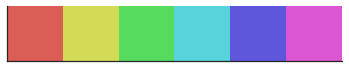

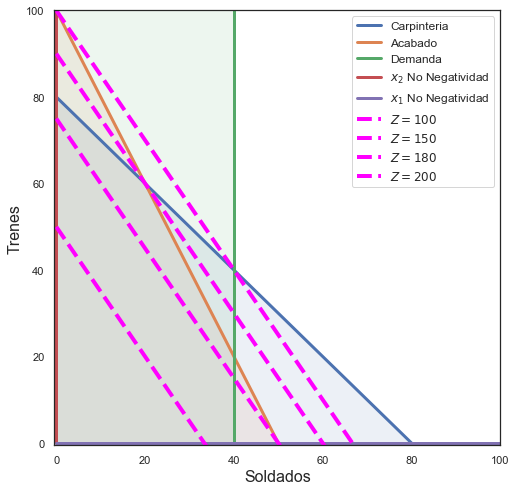

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import seaborn as sns

colores=sns.palplot(sns.color_palette("hls", ))
sns.set()
sns.set(style='white')
sns.despine()
sns.set_context('notebook')

# Crear un objeto gráfico.
fig, ax = plt.subplots(figsize=(8, 8))
x1 = np.linspace(0, 100)

# agregando la restricción de horas de capintería
plt.plot(x1, 80 - x1, lw=3, label='Carpinteria')
plt.fill_between(x1, 0, 80 - x1, alpha=0.1)

# agregando la restricción de horas de acabado
plt.plot(x1, 100 - 2 * x1, lw=3, label='Acabado')
plt.fill_between(x1, 0, 100 - 2 * x1, alpha=0.1)

# agregando la restricción de demanda
plt.plot(40 * np.ones_like(x1), x1, lw=3, label='Demanda')
plt.fill_betweenx(x1, 0, 40, alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(x1), x1, lw=3, label='$x_2$ No Negatividad')
plt.plot(x1, np.zeros_like(x1), lw=3, label='$x_1$ No Negatividad')

# agregando la restricción función objetivo
plt.plot(x1, 50 - (3/2) * x1,color='magenta',linestyle='dashed',lw=4, label='$Z=100$')
plt.plot(x1, 75 - (3/2) * x1,color='magenta',linestyle='dashed',lw=4, label='$Z=150$')
plt.plot(x1, 90 - (3/2) * x1,color='magenta',linestyle='dashed',lw=4, label='$Z=180$')
plt.plot(x1, 100 - (3/2) * x1,color='magenta',linestyle='dashed',lw=4, label='$Z=200$')


plt.xlabel('Soldados', fontsize=16)
plt.ylabel('Trenes', fontsize=16)
plt.xlim(-0.5, 100)
plt.ylim(-0.5, 100)
plt.legend(fontsize=12)
plt.show()